In [1]:
# Author: Swarup

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

In [2]:
data_url = 'https://raw.githubusercontent.com/Customer-Churn-Prediction/Project-Machine-Learning/master/Churning.csv'
data = pd.read_csv(data_url)
target = np.array(data.Churn)
data = data.drop(['Churn', 'Phone'], axis=1)
data['State']= pd.factorize(data.State)[0]
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,415
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,2,415
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,1,408
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,415


In [3]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=42) 


In [4]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

In [5]:
features = data.columns[:17]
features

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge'],
      dtype='object')

In [6]:
knn.fit(train_x[features], train_y)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
pred= knn.predict(test_x[features])
proba=knn.predict_proba(test_x[features])

In [8]:
cnf_matrix = confusion_matrix(test_y, pred)
cnf_matrix

array([[836,  21],
       [100,  43]], dtype=int64)

In [9]:
pd.DataFrame(confusion_matrix(test_y, pred),columns=["Predicted False","Predicted True"],
             index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,836,21
Actual True,100,43


In [10]:
print(accuracy_score(test_y, pred))

0.879


In [11]:
scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')
scores

array([ 0.84615385,  0.87179487,  0.85470085,  0.86695279,  0.87553648,
        0.87982833,  0.83261803,  0.86266094,  0.86695279,  0.87982833])

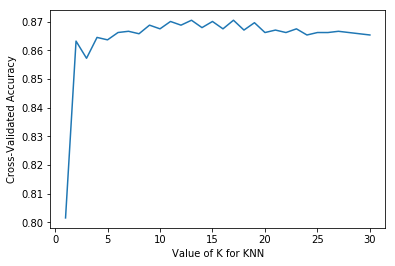

In [12]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

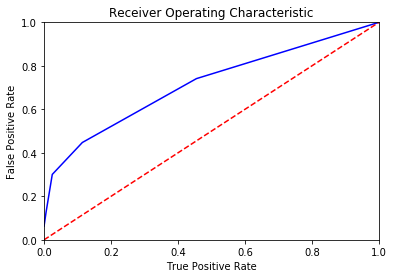

In [13]:
fpr, tpr, threshold = roc_curve(test_y, proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()